## Pandas and its Basics

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
step_data = [3620, 7891, 9761,3907, 4338, 5373]

# Series 
step_counts = pd.Series(step_data,name='steps')
print(step_counts) 

0    3620
1    7891
2    9761
3    3907
4    4338
5    5373
Name: steps, dtype: int64


In [35]:
step_counts.index = pd.date_range('20240217',periods=6)
print(step_counts)

2024-02-17    3620
2024-02-18    7891
2024-02-19    9761
2024-02-20    3907
2024-02-21    4338
2024-02-22    5373
Freq: D, Name: steps, dtype: int64


In [36]:
# Like dictionary
print(step_counts[0])

3620


In [37]:
# Datatypes of step_counts
print(step_counts.dtypes)

int64


In [38]:
# Convert to a float
step_counts = step_counts.astype(np.float)

C:\Users\VIBHUN~1\AppData\Local\Temp/ipykernel_10472/2967966821.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  step_counts = step_counts.astype(np.float)


In [40]:
# Create invalid data
step_counts[1:3] = np.NaN

# Now fill it in with zeros
step_counts = step_counts.fillna(0.)

# step_counts.fillna(0., inplace=True)
print(step_counts[1:3])

2024-02-17    3620.0
2024-02-18       6.0
2024-02-19       6.0
2024-02-20    3907.0
2024-02-21    4338.0
2024-02-22    5373.0
Freq: D, Name: steps, dtype: float64


# Next Part

# Zip used to combine 2 columns together

In [43]:
# Cycling distance
cycling_data = [10.7, 0, None, 2.4, 15.3, 10.9, 0, None]

# Create a list of data
joined_data = list(zip(step_data, cycling_data))

# The dataframe ( Rows and Columns)
activity_df = pd.DataFrame(joined_data)
print(activity_df)

      0     1
0  3620  10.7
1  7891   0.0
2  9761   NaN
3  3907   2.4
4  4338  15.3
5  5373  10.9


In [45]:
# Add column names to dataframe
activity_df = pd.DataFrame(joined_data,index=pd.date_range('20150329', periods=6), columns=['Walking','Cycling'])
print(activity_df)
print()
# Add column names to dataframe
activity_df = pd.DataFrame(joined_data,index=pd.date_range('20150329',periods=6),columns=['Walking','Cycling'])
print(activity_df)


            Walking  Cycling
2015-03-29     3620     10.7
2015-03-30     7891      0.0
2015-03-31     9761      NaN
2015-04-01     3907      2.4
2015-04-02     4338     15.3
2015-04-03     5373     10.9

            Walking  Cycling
2015-03-29     3620     10.7
2015-03-30     7891      0.0
2015-03-31     9761      NaN
2015-04-01     3907      2.4
2015-04-02     4338     15.3
2015-04-03     5373     10.9


# new Dataframe 

In [54]:
# The location of the data file
filepath = 'Iris_Data.csv'

# Import the data
data = pd.read_csv(filepath)

# Print a few rows
print(data.iloc[:])

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [55]:
# Create a new column that is a product
# of both measurements
data['sepal_area'] = data.sepal_length *data.sepal_width
# Print a few rows and column
print(data.iloc[:5, -3:])

   petal_width      species  sepal_area
0          0.2  Iris-setosa       17.85
1          0.2  Iris-setosa       14.70
2          0.2  Iris-setosa       15.04
3          0.2  Iris-setosa       14.26
4          0.2  Iris-setosa       18.00


In [58]:
# The lambda function applies what
data['abbrev'] = (data.species.apply(lambda x:x.replace('Iris-','')))
# Note that there are other ways to
print(data.iloc[:5, -3:])

       species  sepal_area  abbrev
0  Iris-setosa       17.85  setosa
1  Iris-setosa       14.70  setosa
2  Iris-setosa       15.04  setosa
3  Iris-setosa       14.26  setosa
4  Iris-setosa       18.00  setosa


In [59]:
# count of all species by groupby
group_sizes = (data.groupby('species').size())
print(group_sizes)

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [61]:
# Mean of sepal_length
print(data.sepal_length.mean())

5.843333333333335


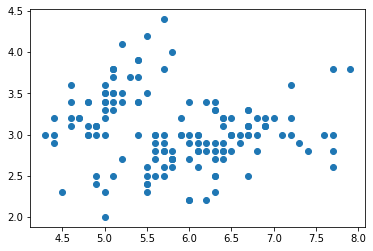

In [63]:
plt.plot(data.sepal_length,data.sepal_width,ls ='', marker='o')

(array([ 4.,  1.,  6.,  5., 16.,  9.,  5.,  6.,  7., 14.,  7.,  9.,  6.,
        13.,  7.,  7.,  8.,  3.,  5.,  1.,  4.,  1.,  1.,  4.,  1.]),
 array([4.3  , 4.444, 4.588, 4.732, 4.876, 5.02 , 5.164, 5.308, 5.452,
        5.596, 5.74 , 5.884, 6.028, 6.172, 6.316, 6.46 , 6.604, 6.748,
        6.892, 7.036, 7.18 , 7.324, 7.468, 7.612, 7.756, 7.9  ]),
 <BarContainer object of 25 artists>)

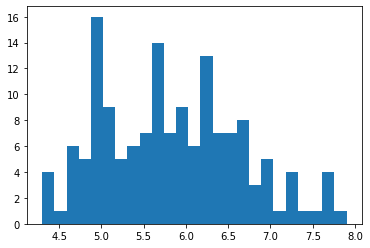

In [64]:
plt.hist(data.sepal_length, bins=25)

C:\Users\Vibhu Nohria\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


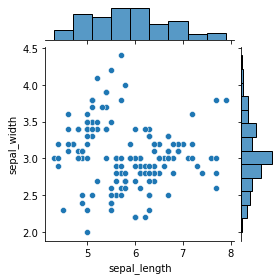

In [66]:
sns.jointplot(x='sepal_length',y='sepal_width',data=data, size=4)